In [1]:
# linear: https://stackabuse.com/linear-regression-in-python-with-scikit-learn/
# KNN: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html
# MLP: https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html

# we are predicting BIRTH WEIGHT (DBWT)

# Setup and imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

train = pd.read_csv("../../data/us_births_train.csv")
test = pd.read_csv("../../data/us_births_test.csv")
train.head()
test.head()

,DBWT,WTGAIN,PWgt_R,PRIORTERM,PRIORLIVE,PRIORDEAD,PREVIS,PAY_REC,PAY,NO_RISKS,M_Ht_In,MEDUC,MAGER,DWgt_R,BMI,ATTEND
0,3810,30,150,0,1,0,10,4,5,0,58,5,30,180,31.3,1
1,4210,34,148,2,2,0,14,2,2,1,66,7,38,182,23.9,1
2,3440,22,145,0,1,0,11,4,5,0,67,6,24,167,22.7,1
3,4607,37,220,1,3,0,13,2,2,1,68,5,28,257,33.4,3
4,3840,30,154,0,0,0,8,2,2,0,65,6,34,184,25.6,1


In [2]:
# Seperate test/train data into X and y (input and output)
X_train = train.drop('DBWT', axis=1) 
y_train = train['DBWT']
X_test = test.drop('DBWT', axis=1)
y_test = test['DBWT']

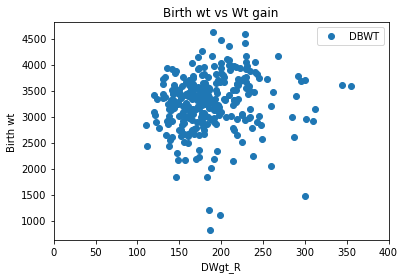

In [3]:
# plot some of the data (is it linear?)
from numpy.random import RandomState

rng = RandomState()
x_var = 'DWgt_R'
sampling = train.sample(frac=0.0001, random_state=rng)
sampling.plot(x=x_var, y='DBWT', style='o')
plt.title('Birth wt vs Wt gain')
plt.xlabel(x_var)
plt.ylabel('Birth wt')
axes = plt.gca()
axes.set_xlim([0, 400]) # crop out outliers and zoom in on majority of data
plt.show()

In [4]:
# TRAIN the model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [5]:
# make predictions
y_pred = regressor.predict(X_test)
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
results.head()

,Actual,Predicted
0,3810,3181.891134
1,4210,3378.959551
2,3440,3233.137570
3,4607,3462.714602
4,3840,3231.770742


Mean Absolute Error: 432.51958777625345
Mean Squared Error: 369077.2321342531
Root Mean Squared Error: 607.5172690008516


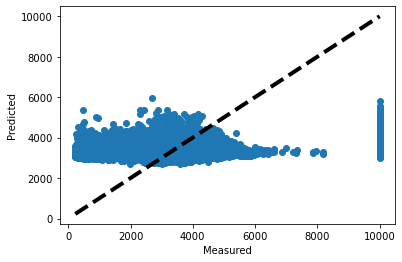

In [6]:
# get some metrics
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# plot predictions vs expected
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()